In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import seed
seed(1)
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import tensorflow
tensorflow.random.set_seed(1)
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [12]:
#1. Get the data and get it ready to use (delete useless columns, change categories values)

df=pd.read_csv("./challenge_youtube_toxic.csv", sep=";",encoding = 'latin1')
df=df.drop(['video_id','video_id_court','channel_id','channel_name','Unnamed: 27'],axis=1)

'''
The categories-fields are useful data for us to analyse, 
but we cannot leave them as they are to compute a neural network algorithm.
We are then going to create one column for each value, and fill it with 0 or 1
'''

df['Core']=(df['categorie_new']=='Core')*1
df['Niche']=(df['categorie_new']=='Niche')*1
df['Partisan']=(df['categorie_new']=='Partisan')*1
df['Pure Players']=(df['categ_inst']=='Pure Players')*1
df['TV']=(df['categ_inst']=='TV')*1
df['Presse_regionale']=(df['categ_inst']=='Presse_regionale')*1
df['Presse nationale']=(df['categ_inst']=='Presse nationale')*1
df['Presse magazine']=(df['categ_inst']=='Presse magazine')*1
df['Alternatif']=(df['categ_inst']=='Alternatif')*1

df=df.drop(['categ_inst','categorie_new'],axis=1)

def convert_into_float(string):
    if type(string)==int:
        return string
    return float(string.replace(',','.'))

df=df.applymap(convert_into_float)

In [21]:
#2. Separate the train and the validation datasets
y=df['nbrMotInsulte'].to_numpy()
x=df.drop(['nbrMotInsulte'],axis=1).to_numpy()

X_train, X_val, y_train, y_val = train_test_split(x, y)

In [22]:
#3. Feature Scaling
y_train=np.reshape(y_train, (-1,1))
y_val=np.reshape(y_val, (-1,1))
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
xtrain_scale=scaler_x.transform(X_train)
xval_scale=scaler_x.transform(X_val)
ytrain_scale=scaler_y.transform(y_train)
yval_scale=scaler_y.transform(y_val)

MinMaxScaler()
MinMaxScaler()
MinMaxScaler()
MinMaxScaler()


In [37]:
#4. Setting up the model
num_features=x.shape[1]
hidden_layers=x.shape[0]/(num_features+1)

model = Sequential()
model.add(Dense(num_features, input_dim=num_features, kernel_initializer='normal', activation='relu'))
model.add(Dense(hidden_layers, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 29)                870       
_________________________________________________________________
dense_4 (Dense)              (None, 1536)              46080     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 1537      
Total params: 48,487
Trainable params: 48,487
Non-trainable params: 0
_________________________________________________________________


In [38]:
#5. Launching the model
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae']) # mean_squared_error (mse) and mean_absolute_error (mae) are our loss functions
history=model.fit(xtrain_scale, ytrain_scale, epochs=30, batch_size=150, verbose=1, validation_split=0.2)
predictions = model.predict(xval_scale)

Epoch 1/30
185/185 [==============================] - 0s 2ms/step - loss: 6.5364e-05 - mse: 6.5364e-05 - mae: 0.0032 - val_loss: 8.6741e-05 - val_mse: 8.6741e-05 - val_mae: 0.0015
Epoch 2/30
185/185 [==============================] - 0s 2ms/step - loss: 1.8669e-05 - mse: 1.8669e-05 - mae: 0.0014 - val_loss: 4.3223e-05 - val_mse: 4.3223e-05 - val_mae: 0.0018
Epoch 3/30
185/185 [==============================] - 0s 1ms/step - loss: 1.4791e-05 - mse: 1.4791e-05 - mae: 0.0014 - val_loss: 2.5759e-05 - val_mse: 2.5759e-05 - val_mae: 0.0010
Epoch 4/30
185/185 [==============================] - 0s 1ms/step - loss: 1.2152e-05 - mse: 1.2152e-05 - mae: 0.0011 - val_loss: 9.6620e-05 - val_mse: 9.6620e-05 - val_mae: 0.0066
Epoch 5/30
185/185 [==============================] - 0s 1ms/step - loss: 1.7455e-05 - mse: 1.7455e-05 - mae: 0.0017 - val_loss: 1.2258e-05 - val_mse: 1.2258e-05 - val_mae: 0.0016
Epoch 6/30
185/185 [==============================] - 0s 1ms/step - loss: 9.7304e-06 - mse: 9.7304e-

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


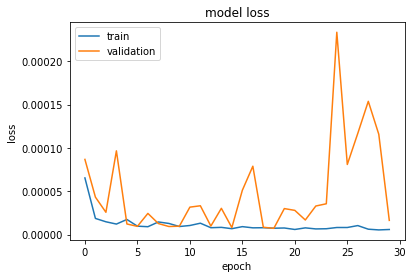

In [39]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [42]:
prediction_unscaled=scaler_y.inverse_transform(predictions)

In [59]:
comparaison=pd.concat([pd.DataFrame(prediction_unscaled).rename(columns={0:'prediction'}),pd.DataFrame(y_val).rename(columns={0:'y_val'})],axis=1)

In [62]:
comparaison.head(50)

,prediction,y_val
0,130.528275,110
1,0.028688,0
2,-0.325098,0
3,15.074013,13
4,3.088567,0
5,1.028023,0
6,1.847547,0
7,5.828797,3
8,-0.235922,0
9,4.439333,2


In [11]:
#Could be a solution to solve the categorisation problem

df=pd.read_csv("./challenge_youtube_toxic.csv", sep=";",encoding = 'latin1')

categ_inst=df.categ_inst.astype("category").cat.codes
categ_inst=pd.Series(categ_inst)
categ_inst.unique()

array([4, 5, 3, 2, 1, 0], dtype=int8)